<a href="https://colab.research.google.com/github/devikamsba2024/Machine_Learning/blob/main/Z956F273_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #3: Clustering

In this assignment you have 2 problems. In each problem you simply select the optimal number of clusters and enter it into the number_of_clusters variable. Then you complete the rest of the notebook and look at the data to confirm whether or not your selection was correct. You will explain your choice of the number of clusters at the end of each problem (it should take no more than three or four sentences).

So, to summarize, what you need to do for each problem is:
- Select the number of clusters.
- Explain your selection based on the data from the exercise.

##
First download the ex1.csv and seeds.csv files from eLearn as you will need them in this notebook. <p>Next, use the code below to import the required packages. Then proceed to problem #1.

In [ ]:
# IMPORT PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#
#
#
#

# PROBLEM 1:
This is a very simple example, just for demonstration purposes. You will need to select the correct number of clusters. First we will print a scatter plot of the data.

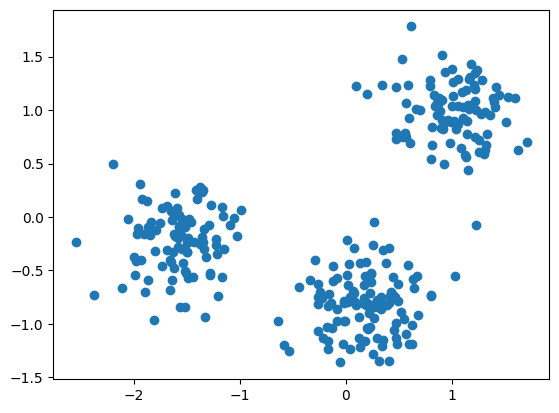

In [ ]:
df = pd.read_csv('ex1.csv')
points = df.values
xs = points[:,0]
ys = points[:,1]
plt.scatter(xs,ys)



##
How many clusters should we look for?
<br>
<p>
Now we will select the appropriate number of clusters and use the K-means algorithm for clustering. You must change the value for the number_of_clusters variable in the block below.

<p>  Observing the scatter plots, the data appears to form three distinct clusters, leading me to choose three.

### Enter the optimal number of clusters below: (10 points)

In [ ]:
#ENTER THE NUMBER OF CLUSTERS IN THE VARIABLE number_of_clusters
number_of_clusters = 3

#

Now we will create out model and fit the data to generate our clusters.

In [ ]:
model = KMeans(n_clusters=number_of_clusters)
model.fit(points)
labels = model.predict(points)

##

If we selected the correct number of clusters then each cluster should be colored differently in the scatter plot below.

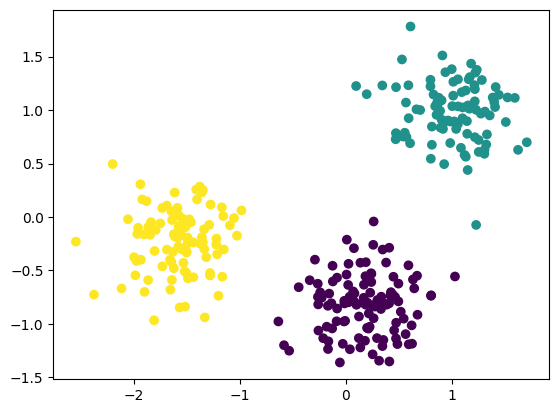

In [ ]:
plt.scatter(xs,ys,c=labels)

##

Now we will confirm that we have the correct number of clusters using the inertia metric.

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(points)
    inertias.append(model.inertia_)

/Users/g/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/g/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/g/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/g/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/g/anaconda3/lib/python3.10/si

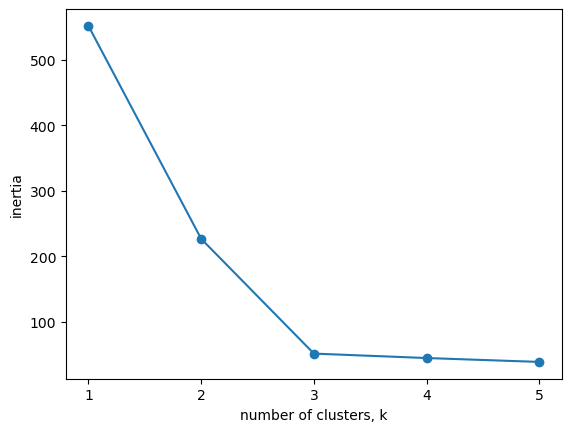

In [ ]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#

### In the block below, please explain why the number of clusters you selected is correct. What evidence supports this? (15 points)


Based on the elbow plot, the optimal number of clusters (k) is typically chosen at the point where the inertia curve starts to flatten out. This indicates diminishing returns in reducing inertia with additional clusters.

From the plot:

The elbow appears around 3 clusters.
After

k=3, the reduction in inertia becomes less significant.
Thus,

k=3 is a reasonable choice for the number of clusters.


# PROBLEM 2:
We have been given a dataset with measurements of seeds. We want to use clustering to try to identify groups of different seeds in the data.

In [ ]:
seeds_df = pd.read_csv('seeds.csv')
varieties = list(seeds_df['grain_variety'])
del seeds_df['grain_variety']
samples = seeds_df.values

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


##

We will look at the independent variables we have in the raw data. They can be seen below.

In [ ]:
seeds_df.head(5)

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


##

We will compute the inertia again to determine the optimal number of clusters in the data.

In [ ]:
from sklearn.cluster import KMeans

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)

##

Based on the plot below, select what you think to be the optimal number of clusters.

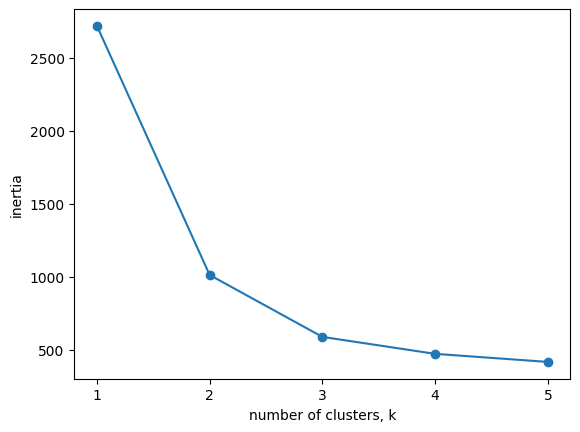

In [ ]:
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#

### Enter the optimal number of clusters below: (5 points)

In [ ]:
#ENTER NUMBER OF CLUSTERS IN number_of_clusters
number_of_clusters = 3

#

Now you will create a table to compare the clusters you created with the labels for the different types of seeds. Does everything look correct?

In [ ]:
model = KMeans(n_clusters=number_of_clusters)
labels = model.fit_predict(samples)
df = pd.DataFrame({'labels': labels, 'varieties': varieties})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
0,0,1,60
1,70,12,0
2,0,57,10


#
#

### In the block below, please explain why the number of clusters you selected is correct. What evidence supports this? (10 points)

 The elbow plot indicates minimal variance beyond 3 clusters which is making 3 clusters a best solution.

ENTER YOUR ANSWER HERE

### Is it possible to interpret these clusters? If so, which dimensions are the most important? If not, why not? (10 points)

For unstructured data, determining the number of clusters simply by examining the data can be challenging. However, scatter plots of specific dimensions, such as area vs. perimeter, length vs. width, or compactness vs. groove length, can help visualize and identify potential clusters. In addition to scatter plots, methods like the Elbow Plot and Silhouette Plot are useful for interpreting the data. Without these visualizations or statistical methods, understanding the clusters becomes difficult. If domain knowledge is available, descriptive statistics can be utilized by grouping data based on mean ± 1 standard deviation (Group 1), mean ± 2 standard deviations (Group 2), and mean ± 3 standard deviations (Group 3) for a more informed analysis.

#
#